### 1.1.1. 最小二乘法
最小化残差平方和
(X*w-y)^2

In [18]:
from sklearn import linear_model



In [19]:
X = [[0,0],[1,1],[2,2]]
Y = [0,1,2]


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [21]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
reg.coef_

array([ 0.5,  0.5])

In [23]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


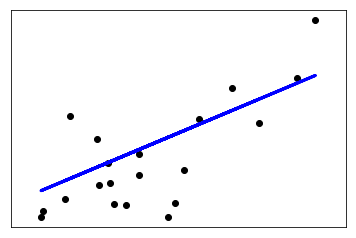

In [27]:
#最小二乘法对随机误差非常敏感，很容易出现很大的方差
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:,np.newaxis,2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**普通最小二乘法使用奇异值分解计算解，如果X为(n,p)的矩阵，设n>p，则该方法的复杂度为O(np^2)**

### 1.1.2 岭回归
通过对系数的大小施加乘法来解决普通最小二乘法的缺点  
$$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$
$\alpha \geq 0$是控制系数收缩量的复杂性参数：$\alpha$的值越大，收缩量越大，系数对共线性的鲁棒性更强

$\alpha $ 通过使用惩罚性，让系数和的值和残差大小达到一个平衡使系数更鲁棒。
因为系数较普通最小二乘较小，因此对共线性鲁棒性更强

In [1]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [2]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [3]:
reg.intercept_ #截距

0.13636363636363641

**复杂度与普通最小二乘相同**

#### 1.1.2.2 设置正则化参数和广义交叉验证
RidgeCV通过内置的alphas实现交叉验证，默认使用广义交叉验证，一种留一验证

In [6]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1,1,10,20])
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

RidgeCV(alphas=[0.1, 1, 10, 20], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [7]:
reg.alpha_

0.10000000000000001

### 1.1.3 Lasso
Lasso是估计稀疏系数的线性模型（可以将系数约减为0），倾向于使用较少参数

因此Lasso及其变体是压缩感知领域的基础


其最小化目标函数为：
$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

惩罚项为 $\alpha ||w||_1 $ ,$||w||_1 $为参数的$\ell_1$-norm 范数

lasso estimate求解带有惩罚项$\alpha ||w||_1 $的最小二乘法的最小值

使用坐标下降算法来拟合系数
>1.坐标上升法：坐标上升与坐标下降可以看做是一对，坐标上升是用来求解max最优化问题，坐标下降用于求min最优化问题，但是两者的执行步骤类似，执行原理相同。例如要求接一个max_f(x1,x2,...,xn)的问题，其中各个xi是自变量，如果应用坐标上升法求解，其执行步骤就是：
+ 1.首先给定一个初始点，如 X_0=(x1,x2,...,xn);
+ 2.for dim=1:n  
   固定xi;(其中i是除dim以外的其他维度)以x_dim为自变量求取使得f取得最大值的x_dim；  
   end   
+ 3.循环执行步骤2，直到f的值不再变化或变化很小。  

>总结：其关键点就是每次只变换一个维度xi,而其他维度都用当前值进行固定，如此循环迭代，最后得到最优解。2.坐标下降法与上述过程类似，不过在第2步求取最优x_dim的值时，变为使得f最小的x_dim;



In [10]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0,0],[1,1]],[0,1])


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
reg.predict([[1, 1]])

array([ 0.8])

**Note Feature selection with Lasso（使用 Lasso 进行特征选择）**  
由于 Lasso 回归产生稀疏模型，因此可以用于执行特征选择，详见 基于 L1 的特征选取 （基于 L1 的特征选择）。

**Lasso的时间复杂度与求解方式有关**

#### 1.1.3.1 设置正则化参数

alpha控制稀疏度,以下几种方法都是为了自动选择最优的alpha

##### 1.1.3.1.1 交叉验证

使用LassoCV和LassoLarsCV.  LassoLarsCV是基于最小角回归算法的

高维数据集通常使用LassoCV，而 LassoLarCV在样本数量与特征数量相比非常小时更快

##### 1.1.3.1.2 基于信息准则的模型选择
除此之外，LassoLarsIC使用Lars训练并使用赤池信息准则（AIC）和贝叶斯信息准则选择模型，在模型的复杂度和正确率之间寻找一个平衡点，减少过拟合。

这是一个在寻找最优Alpha值时计算更少的方法，因为在K折交叉验证时，仅需计算正则化路径一次而不是K+1次。
**此处有段话尚未理解**
> However, such criteria needs a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

##### 1.1.3.1.3 与SVM的正则化参数比较
Alpha与SVM正则化参数C的等式关系为 **alpha = 1 / C** 或 **alpha = 1 / (n_samples * C)**，取决于评估器和模型优化的具体目标函数

### 1.1.4 多任务Lasso

一元Lasso是根据y=X\*w,多任务中y从一维变成二维

在数学上，它由一个线性模型组成，以混合的 $\ell_1 \ell_2$ 作为正则化器进行训练。目标函数最小化是：

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X W - Y||_{Fro} ^ 2 + \alpha ||W||_{21}}$$
其中 $Fro$ 表示 Frobenius 标准：

$$||A||_{Fro} = \sqrt{\sum_{ij} a_{ij}^2}$$

并且 $\ell_1 \ell_2$ 读取为:

$$||A||_{2 1} = \sum_i \sqrt{\sum_j a_{ij}^2}$$

 Lasso 估计产生分散的非零值，而 MultiTaskLasso 的一整列都是非零的。


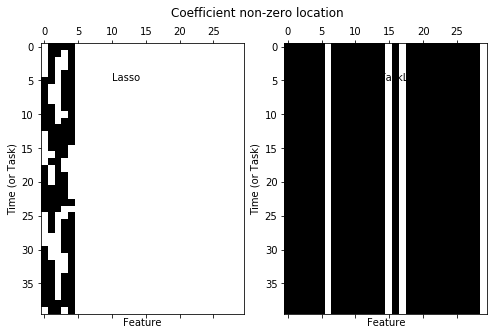

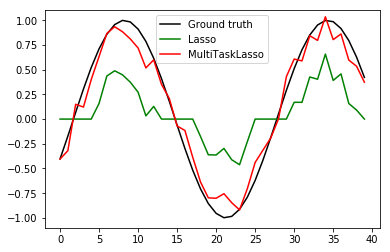

In [10]:
import matplotlib.pyplot as plt  
import numpy as np  
  
from sklearn.linear_model import MultiTaskLasso, Lasso  
  
rng = np.random.RandomState(42)  
  
# Generate some 2D coefficients with sine waves with random frequency and phase  
n_samples, n_features, n_tasks = 100, 30, 40  
n_relevant_features = 5  
coef = np.zeros((n_tasks, n_features))  
times = np.linspace(0, 2 * np.pi, n_tasks)  
for k in range(n_relevant_features):  
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))  
  
X = rng.randn(n_samples, n_features)  
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)  

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])  
coef_multi_task_lasso_ = MultiTaskLasso(alpha=0.5).fit(X, Y).coef_  
  
###############################################################################  
# Plot support and time series  
fig = plt.figure(figsize=(8, 5))  
plt.subplot(1, 2, 1)  
plt.spy(coef_lasso_)  
plt.xlabel('Feature')  
plt.ylabel('Time (or Task)')  
plt.text(10, 5, 'Lasso')  
plt.subplot(1, 2, 2)  
plt.spy(coef_multi_task_lasso_)  
plt.xlabel('Feature')  
plt.ylabel('Time (or Task)')  
plt.text(10, 5, 'MultiTaskLasso')  
fig.suptitle('Coefficient non-zero location')  
  
feature_to_plot = 0  
plt.figure()  
plt.plot(coef[:, feature_to_plot], 'k', label='Ground truth')  
plt.plot(coef_lasso_[:, feature_to_plot], 'g', label='Lasso')  
plt.plot(coef_multi_task_lasso_[:, feature_to_plot],  
         'r', label='MultiTaskLasso')  
plt.legend(loc='upper center')  
plt.axis('tight')  
plt.ylim([-1.1, 1.1])  
plt.show() 

### 1.1.5 弹性网络
使用L1，L2范数作为先验正则项训练的线性回归模型。 这种组合允许学习到一个只有少量参数是非零稀疏的模型，就像 Lasso 一样，但是它仍然保持 一些像 Ridge 的正则性质。我们可利用 **l1_ratio **参数控制 L1 和 L2 的凸组合。

弹性网络在很多特征互相联系的情况下是非常有用的。Lasso 很可能只随机考虑这些特征中的一个，而弹性网络更倾向于选择两个。

在实践中，Lasso 和 Ridge 之间权衡的一个优势是它允许在循环过程（Under rotate）中继承 Ridge 的稳定性

最小化目标函数：
$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

ElasticNetCV 类可以通过交叉验证来设置参数 alpha （ $\alpha $） 和 l1_ratio （ $\rho $） 。

### 1.1.6多任务弹性网络
Y是一个二维数组，形状是(n_samples,n_tasks)

### 1.1.7最小角回归
最小角回归 （LARS） 是对高维数据的回归算法， 由 Bradley Efron, Trevor Hastie, Iain Johnstone 和 Robert Tibshirani 开发完成。 LARS 和逐步回归很像。在每一步，它寻找与响应最有关联的 预测。当有很多预测有相同的关联时，它没有继续利用相同的预测，而是在这些预测中找出应该等角的方向。

LARS的优点:

+ 当 p >> n，该算法数值运算上非常有效。(例如当维度的数目远超点的个数)
+ 它在计算上和前向选择一样快，和普通最小二乘法有相同的运算复杂度。
+ 它产生了一个完整的分段线性的解决路径，在交叉验证或者其他相似的微调模型的方法上非常有用。
+ 如果两个变量对响应几乎有相等的联系，则它们的系数应该有相似的增长率。因此这个算法和我们直觉 上的判断一样，而且还更加稳定。
+ 它很容易修改并为其他估算器生成解，比如Lasso。


LARS 的缺点:

+ 因为 LARS 是建立在循环拟合剩余变量上的，所以它对噪声非常敏感。这个问题，在 2004 年统计年鉴的文章由 Weisberg 详细讨论。
+ LARS 模型可以在 Lars ，或者它的底层实现 lars_path 中被使用。

### 1.1.8 LARS Lasso
使用最小角回归算法(LARS)的Lasso模型

不同于基于坐标下降法的实现，它可以得到一个精确解，也就是一个关于自身参数标准化后的一个分段线性解。

In [13]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])  


LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [14]:
reg.coef_ 

array([ 0.71715729,  0.        ])

### 1.1.9正交匹配追踪法（OMP）

### 1.1.10贝叶斯回归

$$p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)$$
贝叶斯岭回归对病态问题（ill-posed）的鲁棒性要更好。

In [21]:
#贝叶斯岭回归
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [19]:
reg.predict ([[1, 0.]])

array([ 0.50000013])

In [20]:
reg.coef_

array([ 0.49999993,  0.49999993])

#### 主动相关决策理论（稀疏贝叶斯或相关向量机）
但是会导致一个更加稀疏的权重 w [1] [2] 。ARDRegression 提出了一个不同的 w 的先验假设。具体来说，就是弱化了高斯分布为球形的假设。
它采用 w 分布是与轴平行的椭圆高斯分布。

### 1.1.11 logistic回归
一种解决分类问题的线性模型，该模型利用函数 logistic function 将单次试验（single trial）的可能结果输出为概率。

scikit-learn 中 logistic 回归在 LogisticRegression 类中实现了二分类（binary）、一对多分类（one-vs-rest）及多项式 logistic 回归，并带有可选的 L1 和 L2 正则化。

作为优化问题，带 L2 罚项的二分类 logistic 回归要最小化以下代价函数（cost function）：

$$\underset{w, c}{min\,} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .$$

类似地，带 L1 正则的 logistic 回归解决的是如下优化问题：

$$\underset{w, c}{min\,} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .$$


Sklearn中实现了这些优化算法: “liblinear”， “newton-cg”， “lbfgs”， “sag” 和 “saga”。

“liblinear” 应用了坐标下降算法（Coordinate Descent, CD），并基于 scikit-learn 内附的高性能 C++ 库 LIBLINEAR library 实现。不过 CD 算法训练的模型不是真正意义上的多分类模型，而是基于 “one-vs-rest” 思想分解了这个优化问题，为每个类别都训练了一个二元分类器。因为实现在底层使用该求解器的 LogisticRegression 实例对象表面上看是一个多元分类器。 sklearn.svm.l1_min_c 可以计算使用 L1 罚项时 C 的下界，以避免模型为空（即全部特征分量的权重为零）。

“lbfgs”, “sag” 和 “newton-cg” solvers （求解器）只支持 L2 惩罚项，对某些高维数据收敛更快。**这些求解器的参数 `multi_class`设为 “multinomial” 即可训练一个真正的多项式 logistic 回归 [5] ，其预测的概率比默认的 “one-vs-rest” 设定更为准确。**

“sag” 求解器基于平均随机梯度下降算法（Stochastic Average Gradient descent） [6]。**在大数据集上的表现更快，大数据集指样本量大且特征数多。**

“saga” 求解器 [7] 是 “sag” 的一类变体，它支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。

一言以蔽之，选用求解器可遵循如下规则:

<table border="1" class="docutils">
<colgroup>
<col width="45%">
<col width="55%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Case</th>
<th class="head">Solver</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>L1正则</td>
<td>“liblinear” or “saga”</td>
</tr>
<tr class="row-odd"><td>多项式损失（multinomial loss）</td>
<td>“lbfgs”, “sag”, “saga” or “newton-cg”</td>
</tr>
<tr class="row-even"><td>大数据集（<cite>n_samples</cite>）</td>
<td>“sag” or “saga”</td>
</tr>
</tbody>
</table>
**“saga” 一般都是最佳的选择，但出于一些历史遗留原因默认的是 “liblinear” 。**

**对于大数据集，还可以用 SGDClassifier ，并使用对数损失（’log’ loss）**

LogisticRegressionCV 对 logistic 回归 的实现内置了交叉验证（cross-validation）

### 1.1.12 SGD
随机梯度下降是拟合线性模型的一个简单而高效的方法。在样本量（和特征数）很大时尤为有用。 方法 partial_fit 可用于 online learning （在线学习）或基于 out-of-core learning （外存的学习）

SGDClassifier 和 SGDRegressor 分别用于拟合分类问题和回归问题的线性模型，可使用不同的（凸）损失函数，支持不同的罚项。 例如，设定 loss="log" ，则 SGDClassifier 拟合一个逻辑斯蒂回归模型，而 loss="hinge" 拟合线性支持向量机（SVM）。

### 1.1.13. Perceptron（感知器）
Perceptron 是适用于大规模学习的一种简单算法。默认情况下：

+ 不需要设置学习率（learning rate）。
+ 不需要正则化处理。
+ 仅使用错误样本更新模型。

最后一点表明使用合页损失（hinge loss）的感知机比 SGD 略快，所得模型更稀疏。

### 1.1.14. Passive Aggressive Algorithms（被动攻击算法）
被动攻击算法是大规模学习的一类算法。和感知机类似，它也不需要设置学习率，不过比感知机多出一个正则化参数 C 。

对于分类问题， PassiveAggressiveClassifier 可设定 loss='hinge' （PA-I）或 loss='squared_hinge' （PA-II）。对于回归问题， PassiveAggressiveRegressor 可设置 loss='epsilon_insensitive' （PA-I）或 loss='squared_epsilon_insensitive' （PA-II

### 1.1.16. 多项式回归：用基函数展开线性模型
机器学习中一种常见的模式，是使用线性模型训练数据的非线性函数。这种方法保持了一般快速的线性方法的性能，同时允许它们适应更广泛的数据范围。

例如，可以通过构造系数的 polynomial features 来扩展一个简单的线性回归。在标准线性回归的情况下，你可能有一个类似于二维数据的模型:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

如果我们想把抛物面拟合成数据而不是平面，我们可以结合二阶多项式的特征，使模型看起来像这样:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

观察到这 还是一个线性模型 （这有时候是令人惊讶的）: 看到这个，想象创造一个新的变量

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

有了这些重新标记的数据，我们可以将问题写成

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

我们看到，所得的 polynomial regression 与我们上文所述线性模型是同一类（即关于 w 是线性的），因此可以用同样的方法解决。通过用这些基函数建立的高维空间中的线性拟合，该模型具有灵活性，可以适应更广泛的数据范围。

这里是一个例子，使用不同程度的多项式特征将这个想法应用于一维数据